In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

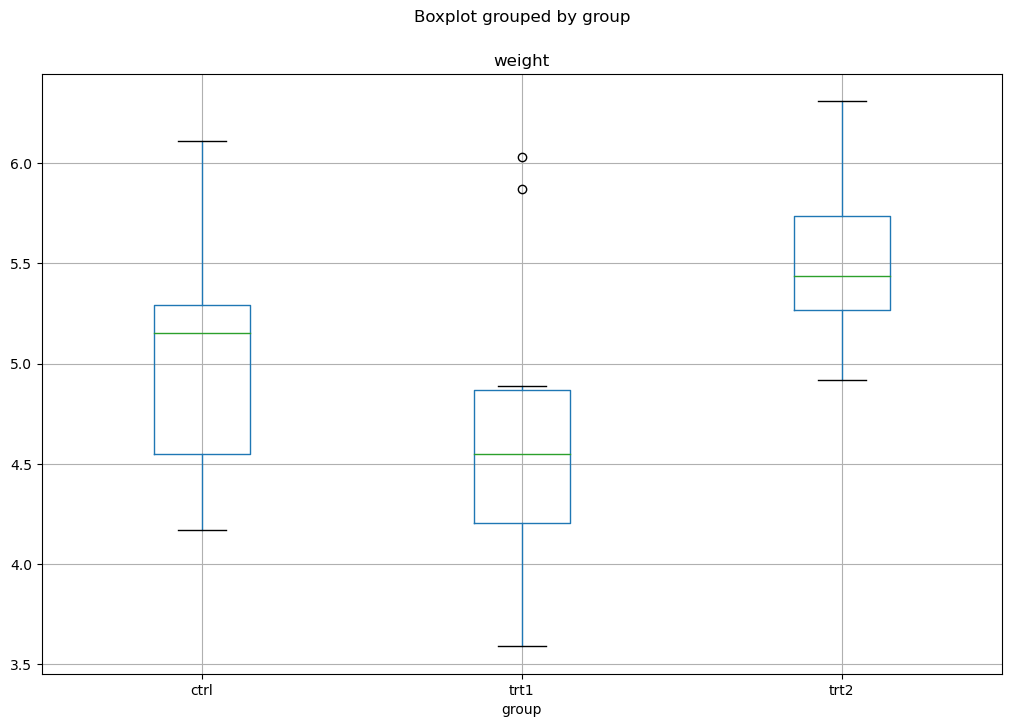

In [7]:
datafile = 'PlantGrowth.csv'
data= pd.read_csv(datafile)

#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))
#sns.boxplot(x="weight", y="group", data=data, palette="PRGn")
plt.show()

ctrl = data['weight'][data.group == 'ctrl']


grps = pd.unique(data.group.values)


d_data = {grp:data['weight'][data.group == grp] for grp in grps}

 
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

In [5]:
# ANOVA Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod= ols('weight ~ group',
            data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [8]:
#Tukey's Test

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc=MultiComparison(data['weight'], data['group'])
result=mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------
['ctrl' 'trt1' 'trt2']
